## Extract reviews of any product from ecommerce website like amazon & Perform emotion mining

In [1]:
#importing necessary libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt #graphical representation
import seaborn as sns

import string # special operations on strings
import spacy # language models

from nltk.corpus import stopwords

from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline 

import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [2]:
headers = {'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',   
    
} 

In [3]:
def get_soup(url):
    r = requests.get(url, headers=headers,  params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup 

In [4]:
#look for web-tags in our soup, then append our data to reviewList
# Initialize list to store reviews data later on

reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [5]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/Airdopes-121v2-Bluetooth-Immersive-Assistant/product-reviews/B08JQN8DGZ/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break  

  0%|          | 0/999 [00:00<?, ?it/s]

In [6]:
# Save results to a dataframe.. 
data = pd.DataFrame(reviewlist)
data.to_csv('Amzon_boat.csv', index=False)
data 

,Rating,Title,Review,Review_Date
0,4.0,"For calling purpose it is bad but for movie,ga...",Buy for gaming and movie but don't buy if you ...,Reviewed in India 🇮🇳 on 9 January 2023
1,4.0,value,I bought it for Rs 1000 that's why it is corre...,Reviewed in India 🇮🇳 on 3 January 2023
2,4.0,Nice Product,"Nice product, easy to control music and touch ...",Reviewed in India 🇮🇳 on 9 January 2023
3,4.0,"quality is good ,but not freely fiting to ears ..","quality is good ,but poor noise cancellation..",Reviewed in India 🇮🇳 on 14 January 2023
4,4.0,Best product,It's been a year and still the product gives m...,Reviewed in India 🇮🇳 on 9 January 2023
...,...,...,...,...
2145,2.0,Sound Quality dissapointed,Dissapointed with sound Quality.Sone noise dur...,Reviewed in India 🇮🇳 on 30 July 2022
2146,1.0,Received damaged product,The media could not be loaded.\n ...,Reviewed in India 🇮🇳 on 8 August 2022
2147,2.0,I request for return.,"Not satisfied with the quality, i disappointed...",Reviewed in India 🇮🇳 on 8 August 2022
2148,4.0,Overall good product,Overall product is good and worth for money.It...,Reviewed in India 🇮🇳 on 15 July 2021


In [7]:
data=pd.read_csv('Amzon_boat.csv')
data.head()

,Rating,Title,Review,Review_Date
0,4.0,"For calling purpose it is bad but for movie,ga...",Buy for gaming and movie but don't buy if you ...,Reviewed in India 🇮🇳 on 9 January 2023
1,4.0,value,I bought it for Rs 1000 that's why it is corre...,Reviewed in India 🇮🇳 on 3 January 2023
2,4.0,Nice Product,"Nice product, easy to control music and touch ...",Reviewed in India 🇮🇳 on 9 January 2023
3,4.0,"quality is good ,but not freely fiting to ears ..","quality is good ,but poor noise cancellation..",Reviewed in India 🇮🇳 on 14 January 2023
4,4.0,Best product,It's been a year and still the product gives m...,Reviewed in India 🇮🇳 on 9 January 2023


In [8]:
# Removing 'Reviewed in India 🇮🇳 on '

Review_date=[0]

word_list = ['Reviewed', 'in', 'India', '🇮🇳' , 'on']
repl_wrd = ''

for i in range(0, len(data)):
    new_string = ' '.join([repl_wrd if idx in word_list else idx for idx in data.Review_Date[i].split()])
    Review_date.append(new_string)

data['Review_Date'] = Review_date[1:]

In [9]:
data

,Rating,Title,Review,Review_Date
0,4.0,"For calling purpose it is bad but for movie,ga...",Buy for gaming and movie but don't buy if you ...,9 January 2023
1,4.0,value,I bought it for Rs 1000 that's why it is corre...,3 January 2023
2,4.0,Nice Product,"Nice product, easy to control music and touch ...",9 January 2023
3,4.0,"quality is good ,but not freely fiting to ears ..","quality is good ,but poor noise cancellation..",14 January 2023
4,4.0,Best product,It's been a year and still the product gives m...,9 January 2023
...,...,...,...,...
2145,2.0,Sound Quality dissapointed,Dissapointed with sound Quality.Sone noise dur...,30 July 2022
2146,1.0,Received damaged product,The media could not be loaded.\n ...,8 August 2022
2147,2.0,I request for return.,"Not satisfied with the quality, i disappointed...",8 August 2022
2148,4.0,Overall good product,Overall product is good and worth for money.It...,15 July 2021


#### EDA

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2150 entries, 0 to 2149
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       2150 non-null   float64
 1   Title        2150 non-null   object 
 2   Review       2080 non-null   object 
 3   Review_Date  2150 non-null   object 
dtypes: float64(1), object(3)
memory usage: 67.3+ KB


In [11]:
data.describe()

,Rating
count,2150.000000
mean,3.642326
std,1.174403
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [12]:
data.Review.isna().sum()

70

In [13]:
#for those entries where data.Review is null, replace Review with Title
data['Review'] = data['Review'].fillna(data['Title'])

In [14]:
#Stripping white spaces in Review_date
review_date = [0]

for i in range(0, len(data)):
    a= data.Review_Date[i].strip()
    review_date.append(a)

In [15]:
data['Review_Date']= review_date[1:] 

##### No. of words in each tweet

In [16]:
data ['word_count'] = data ['Review'].apply(lambda x: len(str(x).split(' ')))
data[['Rating', 'Review', 'word_count']] .head()

,Rating,Review,word_count
0,4.0,Buy for gaming and movie but don't buy if you ...,22
1,4.0,I bought it for Rs 1000 that's why it is corre...,35
2,4.0,"Nice product, easy to control music and touch ...",16
3,4.0,"quality is good ,but poor noise cancellation..",7
4,4.0,It's been a year and still the product gives m...,23


#### No. of stopwords

In [17]:
stop = stopwords.words('english')
data['stopword_count']=data.Review.apply(lambda x: len([x for x in x.split() if x in stop])) 
data[['Rating', 'Review', 'word_count', 'stopword_count']].head()

,Rating,Review,word_count,stopword_count
0,4.0,Buy for gaming and movie but don't buy if you ...,22,11
1,4.0,I bought it for Rs 1000 that's why it is corre...,35,17
2,4.0,"Nice product, easy to control music and touch ...",16,4
3,4.0,"quality is good ,but poor noise cancellation..",7,1
4,4.0,It's been a year and still the product gives m...,23,12


#### No. of digits

In [18]:
data['digits'] = data['Review'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data[['Rating', 'Review', 'word_count', 'stopword_count', 'digits']].head()

,Rating,Review,word_count,stopword_count,digits
0,4.0,Buy for gaming and movie but don't buy if you ...,22,11,0
1,4.0,I bought it for Rs 1000 that's why it is corre...,35,17,1
2,4.0,"Nice product, easy to control music and touch ...",16,4,0
3,4.0,"quality is good ,but poor noise cancellation..",7,1,0
4,4.0,It's been a year and still the product gives m...,23,12,0


#### No. of URLs

In [19]:
data['web_links'] = data['Review'].apply(lambda x: len([x for x in x.split() if x.startswith('https://')]))
data[['Rating', 'Review', 'word_count', 'stopword_count', 'digits', 'web_links']].head()

,Rating,Review,word_count,stopword_count,digits,web_links
0,4.0,Buy for gaming and movie but don't buy if you ...,22,11,0,0
1,4.0,I bought it for Rs 1000 that's why it is corre...,35,17,1,0
2,4.0,"Nice product, easy to control music and touch ...",16,4,0,0
3,4.0,"quality is good ,but poor noise cancellation..",7,1,0,0
4,4.0,It's been a year and still the product gives m...,23,12,0,0


In [20]:
data.web_links.value_counts()
#no weblinks 

0    2150
Name: web_links, dtype: int64

#### No. of hashtags

In [21]:
data['hashtag'] = data['Review'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
data[['Rating', 'Review', 'word_count', 'stopword_count', 'digits', 'web_links', 'hashtag']].head()

,Rating,Review,word_count,stopword_count,digits,web_links,hashtag
0,4.0,Buy for gaming and movie but don't buy if you ...,22,11,0,0,0
1,4.0,I bought it for Rs 1000 that's why it is corre...,35,17,1,0,0
2,4.0,"Nice product, easy to control music and touch ...",16,4,0,0,0
3,4.0,"quality is good ,but poor noise cancellation..",7,1,0,0,0
4,4.0,It's been a year and still the product gives m...,23,12,0,0,0


In [22]:
data.hashtag.value_counts()
# 4 hashtags

0    2150
Name: hashtag, dtype: int64

#### Feature Engineering

In [23]:
data['date'] = data['Review_Date'].str.split(' ').str[0] 

In [24]:
data['Month'] = data['Review_Date'].str.split(' ').str[1] 

In [25]:
data['Year'] = data['Review_Date'].str.split(' ').str[2] 

In [26]:
data[['Review_Date', 'date', 'Month', 'Year']] 

,Review_Date,date,Month,Year
0,9 January 2023,9,January,2023
1,3 January 2023,3,January,2023
2,9 January 2023,9,January,2023
3,14 January 2023,14,January,2023
4,9 January 2023,9,January,2023
...,...,...,...,...
2145,30 July 2022,30,July,2022
2146,8 August 2022,8,August,2022
2147,8 August 2022,8,August,2022
2148,15 July 2021,15,July,2021


In [27]:
data

,Rating,Title,Review,Review_Date,word_count,stopword_count,digits,web_links,hashtag,date,Month,Year
0,4.0,"For calling purpose it is bad but for movie,ga...",Buy for gaming and movie but don't buy if you ...,9 January 2023,22,11,0,0,0,9,January,2023
1,4.0,value,I bought it for Rs 1000 that's why it is corre...,3 January 2023,35,17,1,0,0,3,January,2023
2,4.0,Nice Product,"Nice product, easy to control music and touch ...",9 January 2023,16,4,0,0,0,9,January,2023
3,4.0,"quality is good ,but not freely fiting to ears ..","quality is good ,but poor noise cancellation..",14 January 2023,7,1,0,0,0,14,January,2023
4,4.0,Best product,It's been a year and still the product gives m...,9 January 2023,23,12,0,0,0,9,January,2023
...,...,...,...,...,...,...,...,...,...,...,...,...
2145,2.0,Sound Quality dissapointed,Dissapointed with sound Quality.Sone noise dur...,30 July 2022,13,3,0,0,0,30,July,2022
2146,1.0,Received damaged product,The media could not be loaded.\n ...,8 August 2022,117,42,0,0,0,8,August,2022
2147,2.0,I request for return.,"Not satisfied with the quality, i disappointed...",8 August 2022,10,5,0,0,0,8,August,2022
2148,4.0,Overall good product,Overall product is good and worth for money.It...,15 July 2021,32,13,0,0,0,15,July,2021


In [28]:
#keeping useful columns and droppping others for the moment
data1 = data[['Rating','Title','Review', 'date', 'Month', 'Year']]
data1 

,Rating,Title,Review,date,Month,Year
0,4.0,"For calling purpose it is bad but for movie,ga...",Buy for gaming and movie but don't buy if you ...,9,January,2023
1,4.0,value,I bought it for Rs 1000 that's why it is corre...,3,January,2023
2,4.0,Nice Product,"Nice product, easy to control music and touch ...",9,January,2023
3,4.0,"quality is good ,but not freely fiting to ears ..","quality is good ,but poor noise cancellation..",14,January,2023
4,4.0,Best product,It's been a year and still the product gives m...,9,January,2023
...,...,...,...,...,...,...
2145,2.0,Sound Quality dissapointed,Dissapointed with sound Quality.Sone noise dur...,30,July,2022
2146,1.0,Received damaged product,The media could not be loaded.\n ...,8,August,2022
2147,2.0,I request for return.,"Not satisfied with the quality, i disappointed...",8,August,2022
2148,4.0,Overall good product,Overall product is good and worth for money.It...,15,July,2021


#### Data Visualisation

###### Reviews by Year

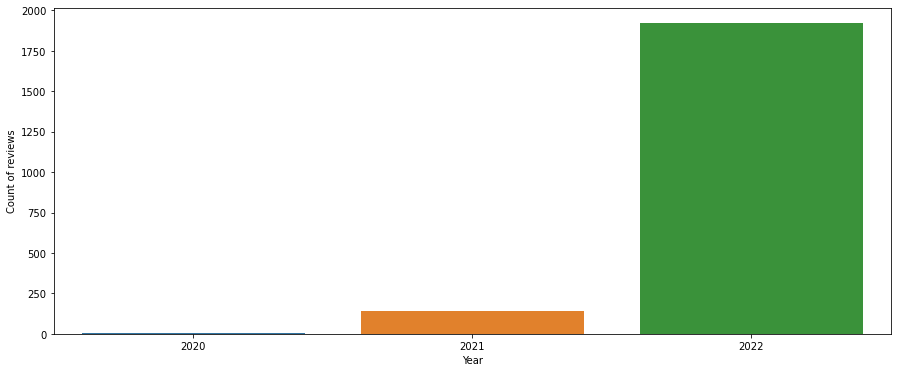

In [29]:
import seaborn as sns
plt.figure(figsize=(15,6))
sns.countplot(data1.Year, order=['2020','2021','2022'] ) 
plt.xlabel('Year')
plt.ylabel('Count of reviews')
plt.show()

##### Reviews by Month-Year

In [30]:
data['Mo_Year'] = data['Month'] + ' ' + data['Year'] 

In [31]:
a = pd.DataFrame(data['Mo_Year'].value_counts() ) 
a = a.reset_index(level=0)

In [32]:
# convert to date
a['index'] = pd.to_datetime(a['index'])
a.sort_values(by='index').reset_index(drop=True) 

a = a.rename(columns={'index':'month_year', 'Mo_Year': 'review_count'}) 

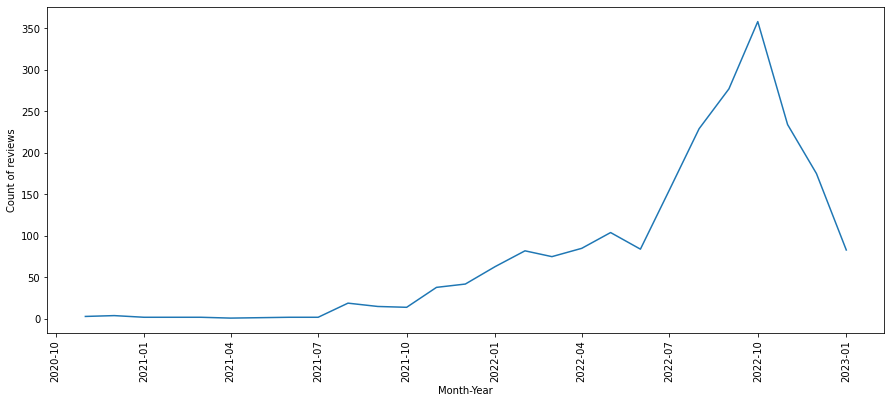

In [33]:
plt.figure(figsize=(15,6))
sns.lineplot(x=a.month_year, y=a.review_count)
plt.xlabel('Month-Year')
plt.ylabel('Count of reviews')
plt.xticks(rotation = 90 )
plt.show() 

#sell of BoAt airdopes increased from oct 2021 and peaked during oct 2022-- Graph shows sell drop in nov 2022 because we could capture data till nov 1st w

#### Reviews by Stars

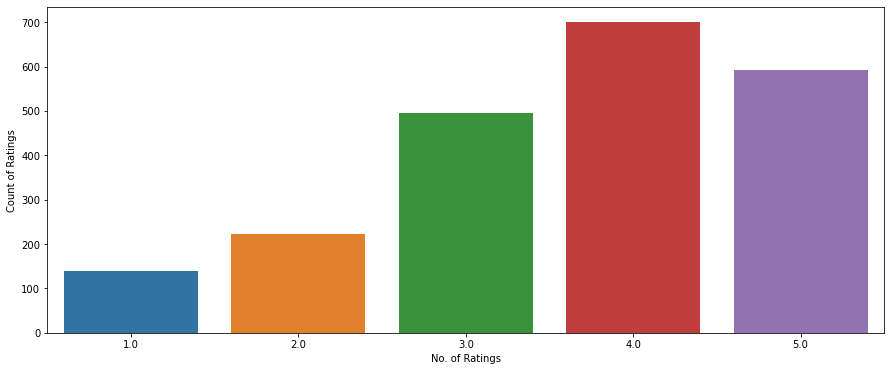

In [34]:
plt.figure(figsize=(15,6))
sns.countplot(data1.Rating) 
plt.xlabel('No. of Ratings')
plt.ylabel('Count of Ratings')
plt.show()

### Text Preprocessing

In [35]:
#Keeping features which are imp for time being
data2 = data1[['Review']] 
data2 

,Review
0,Buy for gaming and movie but don't buy if you ...
1,I bought it for Rs 1000 that's why it is corre...
2,"Nice product, easy to control music and touch ..."
3,"quality is good ,but poor noise cancellation.."
4,It's been a year and still the product gives m...
...,...
2145,Dissapointed with sound Quality.Sone noise dur...
2146,The media could not be loaded.\n ...
2147,"Not satisfied with the quality, i disappointed..."
2148,Overall product is good and worth for money.It...


#### Removing punctuations, digits, emogies and normalising reviews

In [36]:
import re 
corpus = []



for i in range(0, len(data2)):
    #review = re.sub('@[^\s]+' , '' , data2.Review[i]) #remove userid
    #review = re.sub(r'http\S+' , '', review ) #remove URL
    
    review = re.sub(r'[^\w\s]', '', data2.Review[i]) #remove punctuation
    review = review.lower() #normalise
    review = re.sub(r'\d', '', review) #remove digits
    
    corpus.append(review)

In [37]:
corpus

['buy for gaming and movie but dont buy if you want to talk a lot on phone calls microphones are not good',
 'i bought it for rs  thats why it is correct to say that this is value for money for mesound quality is good at this pricebass is also goodbut noise cancellation should be improved',
 'nice product easy to control music and touch control is working properly sound quality is good',
 'quality is good but poor noise cancellation',
 'its been a year and still the product gives me the same result as it was bought for the first time overall best',
 'sound quality are nice',
 'sound quality good nosie cancellation good and bass nice sound',
 'sound output',
 'worth the price go for it',
 'very good',
 'nice profuct',
 'its connectivity is not good',
 'i just brought it for the cuteness  i wanted something pink thats all i didnt like the red and  blue light that blinks  and when no music or sound is playing there is  mild low grrrrrrr sound  but its pink n cute n cheap and i scarcely us

In [38]:
data2['clean_reviews'] = corpus 

In [39]:
data2

,Review,clean_reviews
0,Buy for gaming and movie but don't buy if you ...,buy for gaming and movie but dont buy if you w...
1,I bought it for Rs 1000 that's why it is corre...,i bought it for rs thats why it is correct to...
2,"Nice product, easy to control music and touch ...",nice product easy to control music and touch c...
3,"quality is good ,but poor noise cancellation..",quality is good but poor noise cancellation
4,It's been a year and still the product gives m...,its been a year and still the product gives me...
...,...,...
2145,Dissapointed with sound Quality.Sone noise dur...,dissapointed with sound qualitysone noise duri...
2146,The media could not be loaded.\n ...,the media could not be loaded\n ...
2147,"Not satisfied with the quality, i disappointed...",not satisfied with the quality i disappointed ...
2148,Overall product is good and worth for money.It...,overall product is good and worth for moneyits...


#### Removing stopwords

In [40]:
from nltk.corpus import stopwords

my_stop_words=stopwords.words('english')
user_stop_words = []

my_stop_words.extend(user_stop_words)

stopwords_set = set(my_stop_words)
clean_reviews = []

for i in range (0, len(data2)):
    
    words_without_stopwords = [word for word in data2.clean_reviews[i].split() if not word in my_stop_words]
    
    clean_reviews.append(' '.join(words_without_stopwords))
    
data2['absolute_clean_reviews'] = clean_reviews
data2.head(10) 

,Review,clean_reviews,absolute_clean_reviews
0,Buy for gaming and movie but don't buy if you ...,buy for gaming and movie but dont buy if you w...,buy gaming movie dont buy want talk lot phone ...
1,I bought it for Rs 1000 that's why it is corre...,i bought it for rs thats why it is correct to...,bought rs thats correct say value money mesoun...
2,"Nice product, easy to control music and touch ...",nice product easy to control music and touch c...,nice product easy control music touch control ...
3,"quality is good ,but poor noise cancellation..",quality is good but poor noise cancellation,quality good poor noise cancellation
4,It's been a year and still the product gives m...,its been a year and still the product gives me...,year still product gives result bought first t...
5,Sound quality are nice,sound quality are nice,sound quality nice
6,Sound quality good nosie cancellation good and...,sound quality good nosie cancellation good and...,sound quality good nosie cancellation good bas...
7,Sound output,sound output,sound output
8,Worth the price! Go for it.,worth the price go for it,worth price go
9,Very good,very good,good


#### Tokenisation

In [41]:
tokenized_review = data2['absolute_clean_reviews'].apply(lambda x: x.split())
tokenized_review.head(10) 

0    [buy, gaming, movie, dont, buy, want, talk, lo...
1    [bought, rs, thats, correct, say, value, money...
2    [nice, product, easy, control, music, touch, c...
3           [quality, good, poor, noise, cancellation]
4    [year, still, product, gives, result, bought, ...
5                               [sound, quality, nice]
6    [sound, quality, good, nosie, cancellation, go...
7                                      [sound, output]
8                                   [worth, price, go]
9                                               [good]
Name: absolute_clean_reviews, dtype: object

#### lemmatisation

In [42]:
import nltk
nltk.download('omw-1.4') 
nltk.download('wordnet')  

from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

word_lemmatizer = WordNetLemmatizer()

tokenized_review = tokenized_review.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_review.head(10) 

[nltk_data] Downloading package omw-1.4 to C:\Users\Siddhant
[nltk_data]     Sonawane\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Siddhant
[nltk_data]     Sonawane\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    [buy, gaming, movie, dont, buy, want, talk, lo...
1    [bought, r, thats, correct, say, value, money,...
2    [nice, product, easy, control, music, touch, c...
3           [quality, good, poor, noise, cancellation]
4    [year, still, product, give, result, bought, f...
5                               [sound, quality, nice]
6    [sound, quality, good, nosie, cancellation, go...
7                                      [sound, output]
8                                   [worth, price, go]
9                                               [good]
Name: absolute_clean_reviews, dtype: object

In [43]:
#joining tokens into sentence
for i, tokens in enumerate(tokenized_review):
    tokenized_review[i] = ' '.join(tokens)

data2['absolute_clean_reviews'] = tokenized_review
data2.head(10)

,Review,clean_reviews,absolute_clean_reviews
0,Buy for gaming and movie but don't buy if you ...,buy for gaming and movie but dont buy if you w...,buy gaming movie dont buy want talk lot phone ...
1,I bought it for Rs 1000 that's why it is corre...,i bought it for rs thats why it is correct to...,bought r thats correct say value money mesound...
2,"Nice product, easy to control music and touch ...",nice product easy to control music and touch c...,nice product easy control music touch control ...
3,"quality is good ,but poor noise cancellation..",quality is good but poor noise cancellation,quality good poor noise cancellation
4,It's been a year and still the product gives m...,its been a year and still the product gives me...,year still product give result bought first ti...
5,Sound quality are nice,sound quality are nice,sound quality nice
6,Sound quality good nosie cancellation good and...,sound quality good nosie cancellation good and...,sound quality good nosie cancellation good bas...
7,Sound output,sound output,sound output
8,Worth the price! Go for it.,worth the price go for it,worth price go
9,Very good,very good,good


#### Basic Feature Extraction

#### Bag of Words

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(data2.absolute_clean_reviews)  

In [45]:
print(vectorizer.vocabulary_)   

{'buy': 465, 'gaming': 1278, 'movie': 2058, 'dont': 952, 'want': 3455, 'talk': 3134, 'lot': 1862, 'phone': 2330, 'call': 477, 'microphone': 1975, 'good': 1321, 'bought': 411, 'thats': 3180, 'correct': 743, 'say': 2811, 'value': 3397, 'money': 2026, 'mesound': 1962, 'quality': 2548, 'pricebass': 2428, 'also': 103, 'goodbut': 1332, 'noise': 2138, 'cancellation': 506, 'improved': 1550, 'nice': 2122, 'product': 2463, 'easy': 1037, 'control': 733, 'music': 2078, 'touch': 3266, 'working': 3541, 'properly': 2506, 'sound': 2991, 'poor': 2391, 'year': 3585, 'still': 3054, 'give': 1309, 'result': 2727, 'first': 1218, 'time': 3236, 'overall': 2245, 'best': 340, 'nosie': 2148, 'bass': 284, 'output': 2241, 'worth': 3564, 'price': 2427, 'go': 1316, 'profuct': 2499, 'connectivity': 707, 'brought': 436, 'cuteness': 782, 'wanted': 3456, 'something': 2969, 'pink': 2347, 'didnt': 873, 'like': 1816, 'red': 2650, 'blue': 383, 'light': 1811, 'blink': 379, 'playing': 2363, 'mild': 1989, 'low': 1871, 'grrrrrr

#### Removing some more stopwords

In [46]:
from nltk.corpus import stopwords

my_stop_words=stopwords.words('english')
user_stop_words = ['aa', 'aaa', 'aage', 'aagya', 'aaj', 'aajate', 'aap', 'aapki', 'aata', 'aati', 'aavaj', 'aawaj', 'aawaz', 'aaya', 'ab', 'abhi','accha', 'acche','awaaz', 'awaj', 'awaz','badha', 'badhiya', 'badi', 'badiya'] 

my_stop_words.extend(user_stop_words)

stopwords_set = set(my_stop_words)
clean_reviews = []

for i in range (0, len(data2)):
    
    words_without_stopwords = [word for word in data2.clean_reviews[i].split() if not word in my_stop_words]
    
    clean_reviews.append(' '.join(words_without_stopwords))
    
data2['absolute_clean_reviews'] = clean_reviews
data2.head(10) 

,Review,clean_reviews,absolute_clean_reviews
0,Buy for gaming and movie but don't buy if you ...,buy for gaming and movie but dont buy if you w...,buy gaming movie dont buy want talk lot phone ...
1,I bought it for Rs 1000 that's why it is corre...,i bought it for rs thats why it is correct to...,bought rs thats correct say value money mesoun...
2,"Nice product, easy to control music and touch ...",nice product easy to control music and touch c...,nice product easy control music touch control ...
3,"quality is good ,but poor noise cancellation..",quality is good but poor noise cancellation,quality good poor noise cancellation
4,It's been a year and still the product gives m...,its been a year and still the product gives me...,year still product gives result bought first t...
5,Sound quality are nice,sound quality are nice,sound quality nice
6,Sound quality good nosie cancellation good and...,sound quality good nosie cancellation good and...,sound quality good nosie cancellation good bas...
7,Sound output,sound output,sound output
8,Worth the price! Go for it.,worth the price go for it,worth price go
9,Very good,very good,good


#### Let's see how can bigrams and trigrams can be included here

In [47]:
vectorizer = CountVectorizer(analyzer='word',ngram_range=(1,3), min_df=3) 
X = vectorizer.fit_transform(data2.absolute_clean_reviews).toarray()

In [48]:
count_df = pd.DataFrame(X, columns=vectorizer.get_feature_names())
count_df

,able,able hear,able hear voice,absolutely,accidentally,according,according price,acha,achha,actually,...,yesterday,yet,youll,youre,youtube,zero,अचछ,नह,बहत,रह
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2148,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 5000)
X = vectorizer.fit_transform(data2.absolute_clean_reviews).toarray()

count_df_tf_idf = pd.DataFrame(X, columns=vectorizer.get_feature_names())
count_df_tf_idf

,able,able hear,able hear anything,able hear properly,able hear voice,able listen,absolutely,accessories,accidentally,according,...,सथ,सफ,सफ नह,सफ नह हत,सह,सह नह,सह नह बहत,हत,हत आज,हत आज सह
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.226326,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
data2

,Review,clean_reviews,absolute_clean_reviews
0,Buy for gaming and movie but don't buy if you ...,buy for gaming and movie but dont buy if you w...,buy gaming movie dont buy want talk lot phone ...
1,I bought it for Rs 1000 that's why it is corre...,i bought it for rs thats why it is correct to...,bought rs thats correct say value money mesoun...
2,"Nice product, easy to control music and touch ...",nice product easy to control music and touch c...,nice product easy control music touch control ...
3,"quality is good ,but poor noise cancellation..",quality is good but poor noise cancellation,quality good poor noise cancellation
4,It's been a year and still the product gives m...,its been a year and still the product gives me...,year still product gives result bought first t...
...,...,...,...
2145,Dissapointed with sound Quality.Sone noise dur...,dissapointed with sound qualitysone noise duri...,dissapointed sound qualitysone noise callalso ...
2146,The media could not be loaded.\n ...,the media could not be loaded\n ...,media could loaded received battery tried char...
2147,"Not satisfied with the quality, i disappointed...",not satisfied with the quality i disappointed ...,satisfied quality disappointed product
2148,Overall product is good and worth for money.It...,overall product is good and worth for moneyits...,overall product good worth moneyits case also ...


### Sentiment Analysis

In [53]:
afinn = pd.read_csv('Afinn.csv',sep=',', encoding='latin-1') 

In [54]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [55]:
sent = []
a = 0 

In [56]:
for i in range(0,len(data2)):
    
    for j in range(0,len(data2.absolute_clean_reviews[i].split() )):
        
        word = data2.absolute_clean_reviews[i].split()[j]
        if  word in affinity_scores:
            a = a + affinity_scores[word]
    sent.append(a) 
    a = 0   

In [57]:
data2['sentiment_value'] = sent 
data2[['absolute_clean_reviews', 'sentiment_value']]  

,absolute_clean_reviews,sentiment_value
0,buy gaming movie dont buy want talk lot phone ...,4
1,bought rs thats correct say value money mesoun...,5
2,nice product easy control music touch control ...,7
3,quality good poor noise cancellation,1
4,year still product gives result bought first t...,3
...,...,...
2145,dissapointed sound qualitysone noise callalso ...,0
2146,media could loaded received battery tried char...,0
2147,satisfied quality disappointed product,0
2148,overall product good worth moneyits case also ...,8


In [58]:
data2['sentiment'] = data2['sentiment_value'].apply(lambda c: 'Positive' if c >0 else ('Negative' if c<=-1  else 'Neutral'))
data2[['absolute_clean_reviews','sentiment_value','sentiment']]   

,absolute_clean_reviews,sentiment_value,sentiment
0,buy gaming movie dont buy want talk lot phone ...,4,Positive
1,bought rs thats correct say value money mesoun...,5,Positive
2,nice product easy control music touch control ...,7,Positive
3,quality good poor noise cancellation,1,Positive
4,year still product gives result bought first t...,3,Positive
...,...,...,...
2145,dissapointed sound qualitysone noise callalso ...,0,Neutral
2146,media could loaded received battery tried char...,0,Neutral
2147,satisfied quality disappointed product,0,Neutral
2148,overall product good worth moneyits case also ...,8,Positive


In [59]:
data2.sentiment.value_counts()

Positive    1414
Neutral      460
Negative     276
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

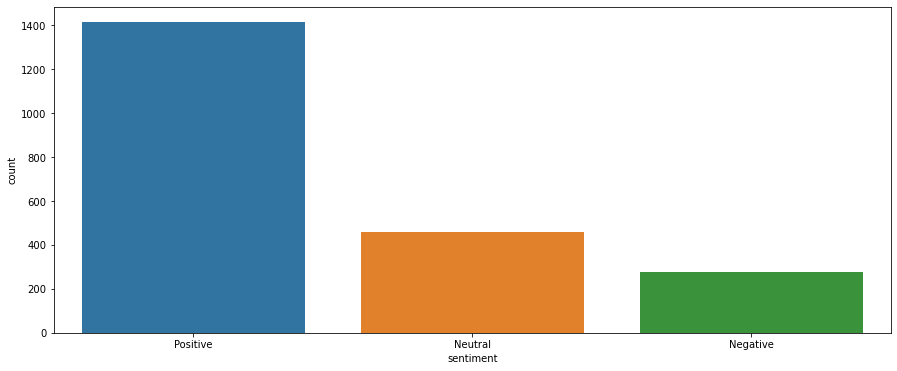

In [60]:
plt.figure(figsize=(15,6))
sns.countplot(data2.sentiment) 

#### Word cloud for Positive words

In [61]:
positive = []
negative = []
neutral = [] 

In [62]:
for i in range(0,len(data2)):
    
    for j in range(0,len(data2.absolute_clean_reviews[i].split() )):
        
        word = data2.absolute_clean_reviews[i].split()[j]
        if  word in affinity_scores:
            a = affinity_scores[word]
            if a > 0: 
                positive.append(word)
            elif a < 0:
                negative.append(word)
            else :
                neutral.append(word)
  

In [63]:
pos =' '.join(positive) 

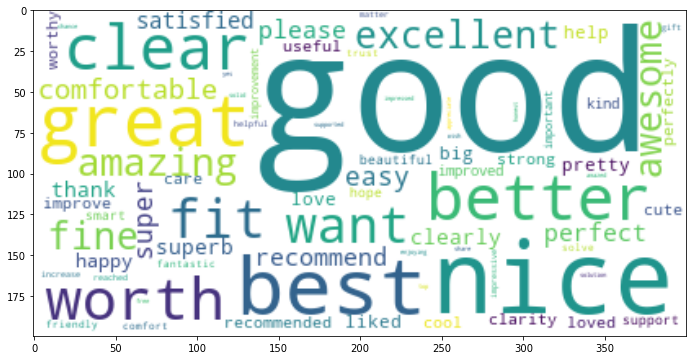

In [64]:
plt.figure(figsize=(18,6))
from wordcloud import WordCloud 
word_cloud = WordCloud(collocations = False, background_color = 'white' ).generate(pos)
plt.imshow(word_cloud, interpolation='bilinear')   

#### Word cloud for Negative words

In [65]:
neg = ' '.join(negative) 

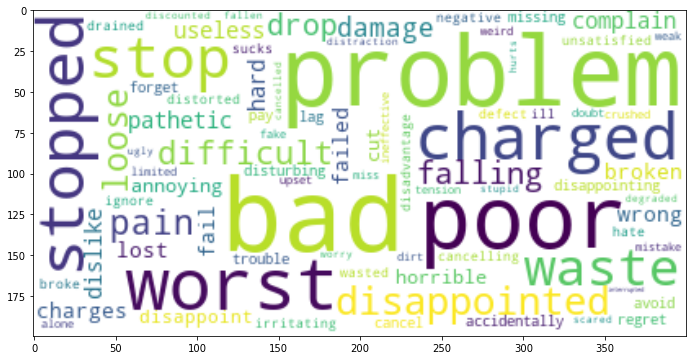

In [66]:
plt.figure(figsize=(18,6))
from wordcloud import WordCloud 
word_cloud = WordCloud(collocations = False, background_color = 'white' ).generate(neg)
plt.imshow(word_cloud, interpolation='bilinear')  

#### Word cloud for All words

In [67]:
absolute_clean_reviews_string=' '.join(data2.absolute_clean_reviews)

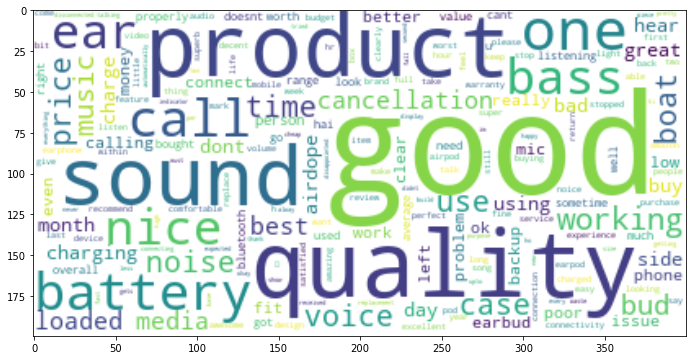

In [68]:
plt.figure(figsize=(18,6))
from wordcloud import WordCloud 
word_cloud = WordCloud(collocations = False, background_color = 'white' ).generate(absolute_clean_reviews_string)
plt.imshow(word_cloud, interpolation='bilinear') 